#Analysis InDiCo dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/_Masterarbeit/uzh_data/"

analyse_uzh_data.ipynb	     new_data
analysis_uzh_data_new.ipynb  optimize_et_clean.ipynb
compare_merged_dfs.ipynb     Optimize_spr_clean.ipynb
data_uzh.csv		     reading_measures.ipynb
fixations_df_cleaned.csv     spr_only.csv
lexical_features.csv	     spr_s1.csv
lexical_features_fixed.csv   spr_s2.csv
merged_data


In [3]:
path = "/content/drive/My Drive/_Masterarbeit/uzh_data/new_data/"
filename = "indico_labels.csv"

In [4]:
import os
import pandas as pd

In [5]:
os.path.join(path, filename)

'/content/drive/My Drive/_Masterarbeit/uzh_data/new_data/indico_labels.csv'

In [6]:
# Keeping pandas from truncating long strings
#pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', None)
df = pd.read_csv(os.path.join(path, filename), sep='\t')

In [7]:
df.head()

,Unnamed: 0,subject_id,session_id,trial_id,text_id,num_questions,n_correct_answers,percentage_correct,median_score_text,binary_score
0,1,1,1,1,13,10,7,0.7,7,0
1,2,1,1,2,14,10,6,0.6,7,0
2,3,1,1,3,4,10,7,0.7,7,0
3,0,1,1,4,3,10,8,0.8,8,0
4,4,1,4,1,11,10,9,0.9,8,1


In [9]:
#number of columns
df.shape

(434, 10)

# How many texts did the subjects read?

In [25]:
# number of texts per subject
import pandas as pd

subject_counts = df.groupby('subject_id')['text_id'].nunique()

text_counts = subject_counts.value_counts()

# Print the result
print("Number of subjects who read 4 texts:", text_counts.get(4, 0))
print("Number of subjects who read 8 texts:", text_counts.get(8, 0))
print("Number of subjects who read a different number of texts:", len(subject_counts) - text_counts.sum())


Number of subjects who read 4 texts: 6
Number of subjects who read 8 texts: 51
Number of subjects who read a different number of texts: 0


In [27]:
# who only read 4 texts?
subject_counts = df.groupby('subject_id')['text_id'].nunique()

# Filter subjects with a count of 4 texts
subjects_with_4_texts = subject_counts[subject_counts == 4]

# Print the IDs of subjects who only read 4 texts
print("Subjects who read 4 texts:")
for subject_id in subjects_with_4_texts.index:
    print(subject_id)

Subjects who read 4 texts:
9
15
17
24
48
51


# How many subjects did my study include?

In [32]:
# subjects i blacklisted in preprocess fixations (see)
BLACKLIST = [2, 3, 31, 38, 43, 46, 59, 60, 1, 9, 13, 15, 17, 24, 39, 40, 44, 45, 48, 51, 52, 62, 63, 64]
print("Number blacklisted: ", len(BLACKLIST))

Number blacklisted:  24


In [39]:
# subjects in the dataset
all_subjects = df['subject_id'].unique().tolist()
not_excluded = [x for x in all_subjects if x not in BLACKLIST]
print(len(all_subjects), " participants were initially in the dataset.")
print(len(BLACKLIST), " participants were excluded due to the data quality or because they only read 4 texts instead of 8.")
print(len(not_excluded), " participants were not excluded")
print(not_excluded)

59  participants were initially in the dataset.
24  participants were excluded due to the data quality or because they only read 4 texts instead of 8.
42  participants were not excluded
[4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 41, 42, 47, 49, 50, 53, 54, 55, 56, 57, 58, 61, 65, 222]


I blacklisted subjects with bad quality 
(bad quality: 2, 3, 31, 38, 43, 46, 59, 60)
and subjects who only participated in one session. 

# Distribution of texts across subjects

In [20]:
# number of subjects who read a given text 
text_counts = df['text_id'].value_counts()
text_counts

5     31
6     31
11    30
12    28
8     28
7     28
9     27
10    27
2     26
1     26
16    26
15    26
13    25
14    25
4     25
3     25
Name: text_id, dtype: int64

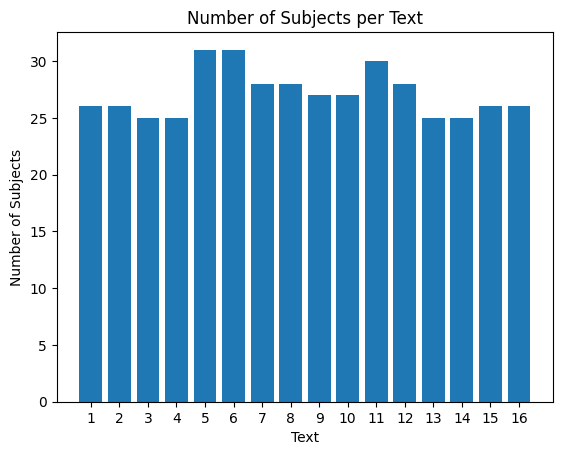

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
# Count the number of subjects for each unique text
text_counts = df['text_id'].value_counts()

# Create a bar plot of the text counts
plt.bar(text_counts.index, text_counts.values)
plt.xlabel('Text')
plt.ylabel('Number of Subjects')
plt.title('Number of Subjects per Text')

# Customize x-tick labels
plt.xticks(range(1, len(text_counts) + 1), range(1, len(text_counts) + 1))

# Display the plot
plt.show()

# Distribution of correctly answered questions


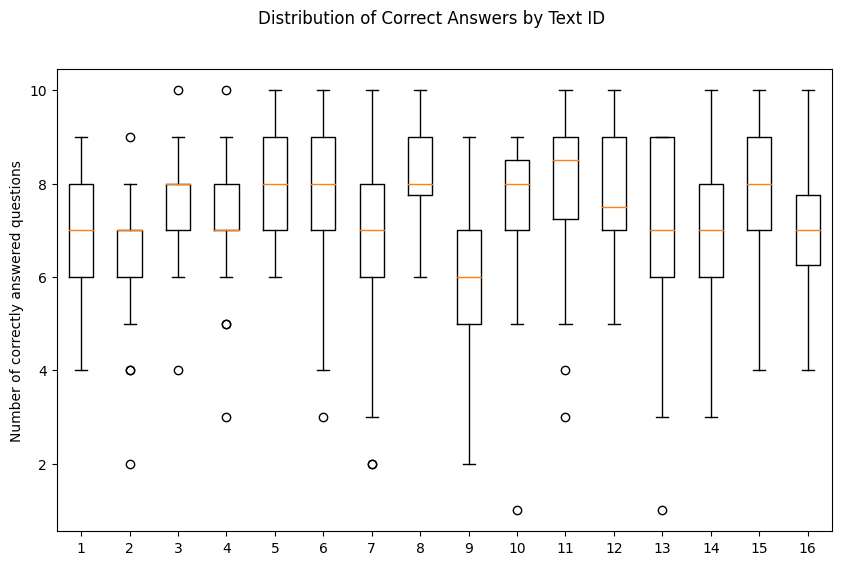

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby('text_id')['n_correct_answers']

data = [group.values for _, group in grouped_data]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_xticks(range(1, len(grouped_data) + 1))
ax.set_ylabel('Number of correctly answered questions')
fig.suptitle('Distribution of Correct Answers by Text ID')

plt.show()
